In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import sys
from glob import glob
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from glob import glob
from tensorflow.keras.preprocessing import image

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_DIR = '/content/drive/MyDrive/AI-2/project'

In [ ]:
#Number of images in each subdir 
split_dirs = ['test','train','validate']
label_dirs = ['cube','cylinder','sphere']
for dir_name in split_dirs:
    for label_dir in label_dirs:
        print(dir_name ,label_dir, len(os.listdir('/content/drive/MyDrive/AI-2/project/synthetic_shape_data_all' + '/' + dir_name + '/' + label_dir)))

test cube 2
test cylinder 2
test sphere 2
train cube 16
train cylinder 21
train sphere 16
validate cube 2
validate cylinder 2
validate sphere 2


In [ ]:
# Preprocessing the image into a 4D tensor
img_path_train = glob(DATA_DIR+'/synthetic_shape_data_all'+'/train/*/*/*.png')
img_path_validate = glob(DATA_DIR+'/synthetic_shape_data_all'+'/validate/*/*/*.png')
img_path_test = glob(DATA_DIR+'/synthetic_shape_data_all'+'/test/*/*/*.png')

print(len(img_path_train))
print(len(img_path_validate))
print(len(img_path_test))
print(img_path_train[0])
print(img_path_validate[0])
print(img_path_test[0])

img = image.load_img(img_path_train[0])
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor /= 255.

print(img_tensor.shape)
type(img_tensor[0])

5241
600
597
/content/drive/MyDrive/AI-2/project/synthetic_shape_data_all/train/cube/cub_L003_W003_H003/synth_cub_L003_W003_H003_X-0251_Y+0849_Z+0139_a008_b330_c175_D1_1506_D2_1786_D3_1399_D4_1705.png
/content/drive/MyDrive/AI-2/project/synthetic_shape_data_all/validate/cylinder/cyl_L050_W020_H020/synth_cyl_L050_W020_H020_X-0228_Y+1150_Z+0286_a241_b246_c055_D1_1251_D2_1549_D3_1452_D4_1722.png
/content/drive/MyDrive/AI-2/project/synthetic_shape_data_all/test/sphere/sph_D047/synth_sph_L047_W047_H047_X-0213_Y+0676_Z-0487_a259_b318_c032_D1_2083_D2_2267_D3_1902_D4_2106.png
(1, 142, 142, 3)


numpy.ndarray

In [ ]:
train_index = list(range(5241))
validate_index = list(range(600))
test_index = list(range(597))

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.DataFrame(columns = ['cube','cylinder','sphere','L','W','H','X','Y','Z','a','b','c','D1','D2','D3','D4','image'], index=train_index)
validate_data = pd.DataFrame(columns = ['cube','cylinder','sphere','L','W','H','X','Y','Z','a','b','c','D1','D2','D3','D4','image'], index=validate_index)
test_data = pd.DataFrame(columns = ['cube','cylinder','sphere','L','W','H','X','Y','Z','a','b','c','D1','D2','D3','D4','image'], index=test_index)

In [ ]:
c = 0
for i in img_path_train:
  features_list = []
  p = i.split('/')
  name = p[-1]
  # print(p[8])
  if p[8] == 'cube':
    features_list.append(1)
    features_list.append(0)
    features_list.append(0)
  elif p[8] == 'cylinder':
    features_list.append(0)
    features_list.append(1)
    features_list.append(0)
  else:
    features_list.append(0)
    features_list.append(0)
    features_list.append(1)
  # print(name)
  features = name.split('_')
  # print(features)
  features_list.append(features[2][1:])
  features_list.append(features[3][1:])
  features_list.append(features[4][1:])
  features_list.append(features[5][1:])
  features_list.append(features[6][1:])
  features_list.append(features[7][1:])
  features_list.append(features[8][1:])
  features_list.append(features[9][1:])
  features_list.append(features[10][1:])
  features_list.append(features[12])
  features_list.append(features[14])
  features_list.append(features[16])
  features_list.append(features[18][:-4])
  features_list.append(i)
  train_data.loc[c] = features_list
  c = c+1

In [ ]:
train_data

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
0,1,0,0,003,003,003,-0251,+0849,+0139,008,330,175,1506,1786,1399,1705,/content/drive/MyDrive/AI-2/project/synthetic_...
1,1,0,0,003,003,003,-0265,+1202,-0198,039,272,227,1595,1875,1816,2074,/content/drive/MyDrive/AI-2/project/synthetic_...
2,1,0,0,003,003,003,-0266,+1174,+0155,204,170,245,1317,1645,1536,1833,/content/drive/MyDrive/AI-2/project/synthetic_...
3,1,0,0,003,003,003,-0330,+1207,+0541,131,274,195,0997,1477,1286,1700,/content/drive/MyDrive/AI-2/project/synthetic_...
4,1,0,0,003,003,003,-0308,+1096,-0420,023,104,041,1810,2099,1937,2217,/content/drive/MyDrive/AI-2/project/synthetic_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,0,0,1,023,023,023,-0001,+1107,+0057,232,354,015,1557,1568,1702,1705,/content/drive/MyDrive/AI-2/project/synthetic_...
5237,0,0,1,023,023,023,-0231,+0968,-0481,055,114,012,1937,2147,1967,2179,/content/drive/MyDrive/AI-2/project/synthetic_...
5238,0,0,1,023,023,023,-0058,+1103,+0370,327,077,063,1317,1402,1465,1539,/content/drive/MyDrive/AI-2/project/synthetic_...
5239,0,0,1,023,023,023,+0649,+0782,+0114,037,006,025,2097,1461,1997,1253,/content/drive/MyDrive/AI-2/project/synthetic_...


In [ ]:
c = 0
for i in img_path_validate:
  features_list = []
  p = i.split('/')
  name = p[-1]
  # print(p[8])
  if p[8] == 'cube':
    features_list.append(1)
    features_list.append(0)
    features_list.append(0)
  elif p[8] == 'cylinder':
    features_list.append(0)
    features_list.append(1)
    features_list.append(0)
  else:
    features_list.append(0)
    features_list.append(0)
    features_list.append(1)
  # print(name)
  features = name.split('_')
  # print(features)
  features_list.append(features[2][1:])
  features_list.append(features[3][1:])
  features_list.append(features[4][1:])
  features_list.append(features[5][1:])
  features_list.append(features[6][1:])
  features_list.append(features[7][1:])
  features_list.append(features[8][1:])
  features_list.append(features[9][1:])
  features_list.append(features[10][1:])
  features_list.append(features[12])
  features_list.append(features[14])
  features_list.append(features[16])
  features_list.append(features[18][:-4])
  features_list.append(i)
  validate_data.loc[c] = features_list
  c = c+1

In [ ]:
validate_data

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
0,0,1,0,050,020,020,-0228,+1150,+0286,241,246,055,1251,1549,1452,1722,/content/drive/MyDrive/AI-2/project/synthetic_...
1,0,1,0,050,020,020,-0240,+0646,-0126,295,147,085,1817,2048,1564,1833,/content/drive/MyDrive/AI-2/project/synthetic_...
2,0,1,0,050,020,020,-0166,+0980,-0647,090,343,075,2096,2242,2140,2284,/content/drive/MyDrive/AI-2/project/synthetic_...
3,0,1,0,050,020,020,-0239,+1187,-0505,030,122,014,1877,2100,2068,2278,/content/drive/MyDrive/AI-2/project/synthetic_...
4,0,1,0,050,020,020,-0161,+1253,+0400,296,326,310,1165,1396,1479,1671,/content/drive/MyDrive/AI-2/project/synthetic_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,1,042,042,042,+0149,+0929,+0494,187,358,117,1481,1301,1452,1247,/content/drive/MyDrive/AI-2/project/synthetic_...
596,0,0,1,042,042,042,+0088,+0877,+0043,271,096,202,1722,1640,1669,1571,/content/drive/MyDrive/AI-2/project/synthetic_...
597,0,0,1,042,042,042,+0722,+0606,-0379,296,141,181,2505,1941,2331,1659,/content/drive/MyDrive/AI-2/project/synthetic_...
598,0,0,1,042,042,042,+0268,+1210,-0725,088,230,079,2279,2071,2469,2261,/content/drive/MyDrive/AI-2/project/synthetic_...


In [ ]:
c = 0
for i in img_path_test:
  features_list = []
  p = i.split('/')
  name = p[-1]
  # print(p[8])
  if p[8] == 'cube':
    features_list.append(1)
    features_list.append(0)
    features_list.append(0)
  elif p[8] == 'cylinder':
    features_list.append(0)
    features_list.append(1)
    features_list.append(0)
  else:
    features_list.append(0)
    features_list.append(0)
    features_list.append(1)
  # print(name)
  features = name.split('_')
  # print(features)
  features_list.append(features[2][1:])
  features_list.append(features[3][1:])
  features_list.append(features[4][1:])
  features_list.append(features[5][1:])
  features_list.append(features[6][1:])
  features_list.append(features[7][1:])
  features_list.append(features[8][1:])
  features_list.append(features[9][1:])
  features_list.append(features[10][1:])
  features_list.append(features[12])
  features_list.append(features[14])
  features_list.append(features[16])
  features_list.append(features[18][:-4])
  features_list.append(i)
  test_data.loc[c] = features_list
  c = c+1

In [ ]:
img_path_test[300].split('/')

['',
 'content',
 'drive',
 'MyDrive',
 'AI-2',
 'project',
 'synthetic_shape_data_all',
 'test',
 'cube',
 'cub_L045_W045_H045',
 'synth_cub_L045_W045_H045_X-0294_Y+0812_Z-0701_a100_b161_c020_D1_2171_D2_2409_D3_2099_D4_2351.png']

In [ ]:
test_data

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
0,0,0,1,047,047,047,-0213,+0676,-0487,259,318,032,2083,2267,1902,2106,/content/drive/MyDrive/AI-2/project/synthetic_...
1,0,0,1,047,047,047,-0185,+0770,-0333,172,328,053,1923,2096,1797,1985,/content/drive/MyDrive/AI-2/project/synthetic_...
2,0,0,1,047,047,047,-0157,+0903,+0078,015,335,127,1559,1737,1515,1701,/content/drive/MyDrive/AI-2/project/synthetic_...
3,0,0,1,047,047,047,-0189,+1492,-0641,119,007,245,1952,2126,2339,2488,/content/drive/MyDrive/AI-2/project/synthetic_...
4,0,0,1,047,047,047,-0304,+1006,+0489,157,164,151,1162,1565,1200,1606,/content/drive/MyDrive/AI-2/project/synthetic_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0,1,0,050,040,040,-0139,+1164,+0486,244,108,314,1167,1370,1388,1564,/content/drive/MyDrive/AI-2/project/synthetic_...
593,0,1,0,050,040,040,-0106,+0611,-0456,153,191,146,2130,2226,1907,2013,/content/drive/MyDrive/AI-2/project/synthetic_...
594,0,1,0,050,040,040,-0101,+1217,+0483,221,287,081,1168,1321,1444,1570,/content/drive/MyDrive/AI-2/project/synthetic_...
595,0,1,0,050,040,040,-0162,+0972,+0190,083,021,127,1443,1638,1459,1655,/content/drive/MyDrive/AI-2/project/synthetic_...


In [ ]:
test_data['L'].unique()

array(['047', '050', '045'], dtype=object)

In [ ]:
test_data['W'].unique()

array(['047', '050', '045', '040'], dtype=object)

In [ ]:
test_data['H'].unique()

array(['047', '050', '045', '040'], dtype=object)

In [ ]:
from PIL import Image

In [ ]:
def create_4_images(path):
  im = Image.open(path)
  width,height = im.size
  images = []
  left = 0
  top = 0
  right = width/2
  bottom = height/2
  imfi = im.crop((left, top, right, bottom))
  images.append(imfi)
  left = width/2
  top = 0
  right = width
  bottom = height/2
  imf2 = im.crop((left, top, right, bottom))
  images.append(imf2)
  left = 0
  top = height/2
  right = width/2
  bottom = height
  imf3 = im.crop((left, top, right, bottom))
  images.append(imf3)
  left = width/2
  top = height/2
  right = width
  bottom = height
  imf4 = im.crop((left, top, right, bottom))
  images.append(imf4)
  return images

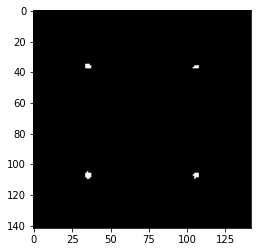

In [ ]:
img = Image.open(train_data['image'][0])
plt.imshow(img)

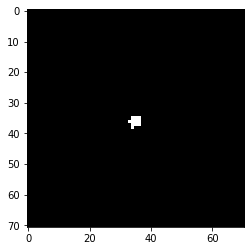

In [ ]:
arrayofimages = create_4_images(train_data['image'][0])
plt.imshow(arrayofimages[3])

In [ ]:
#creating batches
test_data.shape[0]

597

In [ ]:
# def pick_records(dataframe):
#   list_of_indexes = []
#   indexes = []
#   unique_cube = [0,1]
#   unique_cylinder = [0,1]
#   unique_sphere = [0,1]
#   unique_L = dataframe['L'].unique()
#   unique_W = dataframe['W'].unique()
#   unique_H = dataframe['H'].unique()
#   for c in [0,1]:
#     for sh in [0,1]:
#       for cyl in [0,1]:
#         for l in unique_L:
#           for w in unique_W:
#             for h in unique_H:
#                 create_channel(no_of_channels,dataframe,cube,sphere,cylinder,l,w,h,start,end)

In [ ]:
df = test_data[test_data['cube']==1]
df = df[df['L']=='047']
df = df[df['W']=='047']
df = df[df['H']=='047']
df

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
197,1,0,0,047,047,047,-0227,+1231,-0601,303,315,128,1955,2160,2172,2363,/content/drive/MyDrive/AI-2/project/synthetic_...
198,1,0,0,047,047,047,-0284,+1210,-0638,354,080,053,1976,2226,2178,2413,/content/drive/MyDrive/AI-2/project/synthetic_...
199,1,0,0,047,047,047,-0461,+0653,-0497,072,221,054,2037,2414,1828,2255,/content/drive/MyDrive/AI-2/project/synthetic_...
200,1,0,0,047,047,047,-0108,+1104,-0250,066,219,025,1739,1856,1875,1983,/content/drive/MyDrive/AI-2/project/synthetic_...
201,1,0,0,047,047,047,-0354,+1030,-0084,173,301,332,1537,1910,1611,1983,/content/drive/MyDrive/AI-2/project/synthetic_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1,0,0,047,047,047,+0628,+1279,-0744,157,152,067,2480,1994,2701,2228,/content/drive/MyDrive/AI-2/project/synthetic_...
293,1,0,0,047,047,047,+0497,+1337,-0244,231,293,272,2016,1529,2301,1856,/content/drive/MyDrive/AI-2/project/synthetic_...
294,1,0,0,047,047,047,+0601,+0925,-0657,258,271,113,2491,2032,2513,2021,/content/drive/MyDrive/AI-2/project/synthetic_...
295,1,0,0,047,047,047,+0721,+0759,-0264,067,133,312,2367,1759,2278,1583,/content/drive/MyDrive/AI-2/project/synthetic_...


In [ ]:
df['image'].index

Int64Index([197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
            210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
            223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
            249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
            262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
            275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
            288, 289, 290, 291, 292, 293, 294, 295, 296],
           dtype='int64')

In [ ]:
len(df['image'].index)

100

In [ ]:
channels = []
for i in df['image']:
  arrayofimages = create_4_images(i)
  channels.append(arrayofimages[0])
  channels.append(arrayofimages[1])
  channels.append(arrayofimages[2])
  channels.append(arrayofimages[3])

In [ ]:
len(channels)

400

In [ ]:
import random

In [ ]:
def pickrandom(no_of_channels,indexes):
  randomlist = []
  for i in range(no_of_channels):
    n = random.randint(0,len(indexes))
    randomlist.append(indexes[n])
  return randomlist

In [ ]:
pick = pickrandom(16,df['image'].index)
pick

[203,
 290,
 245,
 275,
 296,
 217,
 231,
 279,
 267,
 233,
 242,
 218,
 201,
 232,
 229,
 212]

In [ ]:
df = df.loc[pick]
df

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
203,1,0,0,047,047,047,-0383,+0824,+0181,173,006,277,1442,1862,1296,1767,/content/drive/MyDrive/AI-2/project/synthetic_...
290,1,0,0,047,047,047,+0780,+0838,+0062,261,122,059,2195,1448,2144,1300,/content/drive/MyDrive/AI-2/project/synthetic_...
245,1,0,0,047,047,047,+0277,+0842,-0297,201,008,077,2077,1837,2024,1754,/content/drive/MyDrive/AI-2/project/synthetic_...
275,1,0,0,047,047,047,+0085,+1205,-0104,024,175,005,1688,1606,1907,1824,/content/drive/MyDrive/AI-2/project/synthetic_...
296,1,0,0,047,047,047,+0540,+0735,+0227,321,117,275,1985,1437,1836,1167,/content/drive/MyDrive/AI-2/project/synthetic_...
217,1,0,0,047,047,047,-0097,+0727,-0209,187,292,285,1886,1985,1720,1826,/content/drive/MyDrive/AI-2/project/synthetic_...
231,1,0,0,047,047,047,-0790,+0888,-0286,212,107,002,1691,2386,1633,2374,/content/drive/MyDrive/AI-2/project/synthetic_...
279,1,0,0,047,047,047,-0021,+1047,-0625,111,121,138,2109,2136,2200,2221,/content/drive/MyDrive/AI-2/project/synthetic_...
267,1,0,0,047,047,047,+0047,+0734,-0743,342,348,032,2355,2330,2249,2214,/content/drive/MyDrive/AI-2/project/synthetic_...
233,1,0,0,047,047,047,-0772,+0960,-0396,226,114,098,1754,2418,1763,2451,/content/drive/MyDrive/AI-2/project/synthetic_...


In [ ]:
# def create_channel(no_of_channels,dataframe,cube,sphere,cylinder,l,w,h,start,end):
#   channels = []
#   no_of_images = no_of_channels/4
#   df = dataframe[dataframe['cube']==cube]
#   df = df[df['cylinder']==cylinder]
#   df = df[df['sphere']==sphere]
#   df = df[df['L']==l]
#   df = df[df['W']==w]
#   df = df[df['H']==h]
#   df = df[start:end]
#   for i in df['image']:
#     arrayofimages = create_4_images(i)
#     channels.append(arrayofimages[0])
#     channels.append(arrayofimages[1])
#     channels.append(arrayofimages[2])
#     channels.append(arrayofimages[3])
#   return channels


In [ ]:
def create_channel(no_of_channels,dataframe,cube,sphere,cylinder,l,w,h):
  channels = []
  no_of_images = no_of_channels/4
  no_of_images = int(no_of_images)
  df = dataframe[dataframe['cube']==cube]
  df = df[df['cylinder']==cylinder]
  df = df[df['sphere']==sphere]
  df = df[df['L']==l]
  df = df[df['W']==w]
  df = df[df['H']==h]
  indexes = df['image'].index
  ind = pickrandom(no_of_images,indexes)
  df = df.loc[ind]
  for i in df['image']:
    arrayofimages = create_4_images(i)
    channels.append(arrayofimages[0])
    channels.append(arrayofimages[1])
    channels.append(arrayofimages[2])
    channels.append(arrayofimages[3])
  return df,channels


In [ ]:
df,channels = create_channel(20,test_data,1,0,0,'047','047','047')

In [ ]:
df

,cube,cylinder,sphere,L,W,H,X,Y,Z,a,b,c,D1,D2,D3,D4,image
228,1,0,0,047,047,047,-0741,+1117,-0008,187,254,108,1342,2111,1495,2239,/content/drive/MyDrive/AI-2/project/synthetic_...
263,1,0,0,047,047,047,+0065,+0897,+0292,134,358,326,1547,1481,1495,1414,/content/drive/MyDrive/AI-2/project/synthetic_...
272,1,0,0,047,047,047,+0759,+0706,-0326,070,136,317,2453,1837,2337,1624,/content/drive/MyDrive/AI-2/project/synthetic_...
228,1,0,0,047,047,047,-0741,+1117,-0008,187,254,108,1342,2111,1495,2239,/content/drive/MyDrive/AI-2/project/synthetic_...
239,1,0,0,047,047,047,-0469,+0763,-0050,080,235,210,1620,2079,1439,1959,/content/drive/MyDrive/AI-2/project/synthetic_...


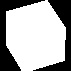

In [ ]:
channels[7]

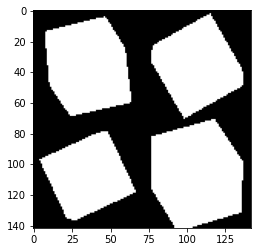

In [ ]:
img = Image.open(df['image'][263])
plt.imshow(img)

In [ ]:
def create_all_channels_for_df(no_of_channels,dataframe):
  list_of_channels = []
  list_of_df = []
  no_of_images = no_of_channels/4
  for c in [0,1]:
    for sh in [0,1]:
      for cyl in [0,1]:
        for l in dataframe['L'].unique():
          for w in dataframe['W'].unique():
            for h in dataframe['H'].unique():
              indexes = list(dataframe['image'].index)
              i = 0
              while(i<len(indexes)):
                start = indexes[i]
                i = i + int(no_of_images)
                if i<len(indexes):
                  end = indexes[i] 
                  df,channels = create_channel(no_of_channels,dataframe,c,sh,cyl,l,w,h)
                  if channels != []:
                    list_of_channels.append(channels)
                    list_of_df.append(df)
                else:
                  end = indexes[-1]
                  df,channels = create_channel(no_of_channels,dataframe,c,sh,cyl,l,w,h)
                  if channels != []:
                    list_of_channels.append(channels)
                    list_of_df.append(df)
  return list_of_channels

In [ ]:
# no_of_channels = 20
# list_of_channels = []
# no_of_images = no_of_channels/4
# for c in [0,1]:
#   for sh in [0,1]:
#     for cyl in [0,1]:
#       for l in test_data['L'].unique():
#         for w in test_data['W'].unique():
#           for h in test_data['H'].unique():
#             indexes = list(test_data['image'].index)
#             i = 0
#             while(i<len(indexes)):
#               start = indexes[i]
#               i = i + int(no_of_images)
#               if i<len(indexes):
#                 end = indexes[i]
#                 channels = create_channel(no_of_channels,test_data,c,sh,cyl,l,w,h,start,end)
#                 if channels != []:
#                   list_of_channels.append(channels)
#               else:
#                 end = indexes[-1]
#                 channels = create_channel(no_of_channels,test_data,c,sh,cyl,l,w,h,start,end)
#                 if channels != []:
#                   list_of_channels.append(channels)

In [ ]:
# channels = create_channel(20,test_data,1,0,0,'047','047','047')

In [ ]:
# no_of_channels = 20
# list_of_channels = {}
# title = ""
# no_of_images = no_of_channels/4
# for c in [0,1]:
#   title = title + str(c) + "_"
#   for sh in [0,1]:
#     title = title + str(sh)+ "_"
#     for cyl in [0,1]:
#       title = title + str(cyl)+ "_"
#       for l in test_data['L'].unique():
#         title = title + str(l)+ "_"
#         for w in test_data['W'].unique():
#           title = title + str(w)+ "_"
#           for h in test_data['H'].unique():
#             title = title + str(h)+ "_"
#             indexes = list(test_data['image'].index)
#             i = 0
#             while(i<len(indexes)):
#               start = indexes[i]
#               i = i + int(no_of_images)
#               if i<len(indexes):
#                 end = indexes[i]
#                 title = title + str(start)+ "_"+ str(end) 
#                 channels = create_channel(no_of_channels,test_data,c,sh,cyl,l,w,h,start,end)
#                 if channels != []:
#                   list_of_channels[title] = channels
#               else:
#                 end = indexes[-1]
#                 title = title + str(start)+ "_"+ str(end) 
#                 channels = create_channel(no_of_channels,test_data,c,sh,cyl,l,w,h,start,end)
#                 if channels != []:
#                   list_of_channels[title] = channels
#             break

In [ ]:
# list_of_df,list_of_channels = create_all_channels_for_df(20,test_data)